In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cmath
plt.style.use('seaborn-v0_8-paper')

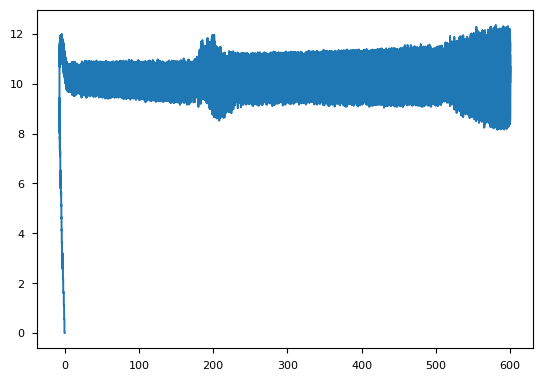

In [2]:
db = pd.read_csv('saida_motor.csv')

#extracting velocity in rpm from db
rpm = db['Data_4']

#extracting Id and Iq from db
i_d = db['Data_1']
i_q = db['Data_2']

#extracting estimated torque
T_ref = db['Data_5']

plt.plot(rpm,T_ref)

In [3]:
#estimated torque equation
def est_torque(Ld, Lq, yf, rpm, i_d, i_q):

    #creating estimated torque equation
    T = (3/4) * 12 * i_q * (Ld * i_d + yf - Lq * i_d)

    #saving db on a csv file
    path = 'torque_est.csv'
    df = pd.DataFrame({
        'rpm': rpm,
        'T_est': T,
    })
    
    df.to_csv(path, index=False)
    
    return path

In [4]:
#root mean square error equation
def RMSE(rpm, T_ref, est_db):

    T_est = pd.read_csv(est_db)

    est = T_est['T_est']

    i = (T_ref - est)**2

    n = len(rpm)

    rmse = np.sqrt((1/n) * np.sum(i))

    error = np.sqrt((T_ref - est)**2)
    
    return rmse

In [5]:
#starting optimazation
from scipy.optimize import dual_annealing
from numpy.random import rand
import time 

#defining parameters inicial values
Ld_init = 0.0066
Lq_init = 0.0066
yf_init = 0.11546

seconds_inicio = time.time()

#setting path
t_est_path = 'torque_est.csv'

def objective(params):
    Ld, Lq, yf = params
    T_est_path = est_torque(Ld, Lq, yf, rpm, i_d, i_q)
    return RMSE(rpm, T_ref, t_est_path)

# define range for input
r_min, r_max = 0.5, 1.5
# define the bounds on the search
bounds = [[r_min*Ld_init, r_max*Ld_init], [r_min*Lq_init, r_max*Lq_init], [r_min*yf_init, r_max*yf_init]]
# perform the dual annealing search
result = dual_annealing(objective, bounds, no_local_search=False, seed=41, maxiter=1000)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))
seconds_final = time.time()
tempo_total = (seconds_final - seconds_inicio)/3600

Status : ['Maximum number of iteration reached']
Total Evaluations: 71
Solution: f([0.00644788 0.00666948 0.17319   ]) = 0.53041


In [6]:
tempo_total

0.023097741140259635